In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing dataset
world_df = pd.read_csv('/content/drive/MyDrive/cap/cwc-world-cup-prediction-data-set/ODI_Match_Data.csv', low_memory=False)
print(f"Dataset successfully Imported of Shape : {world_df.shape}")

Dataset successfully Imported of Shape : (1265103, 23)


In [ ]:
world_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [ ]:
# Adding the total runs and extras till now
world_df['innings_runs'] = world_df.groupby(['match_id', 'innings'])['runs_off_bat'].cumsum() + world_df.groupby(['match_id', 'innings'])['extras'].cumsum()

# Getting the total score for each innings
world_df['total_score'] = world_df.groupby(['match_id', 'innings'])['innings_runs'].transform('last').astype(int)

In [ ]:
world_df.head(483)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,innings_runs,total_score
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,4,399
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,4,399
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,8,399
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,8,399
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,8,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.4,Australia,India,SA Abbott,JR Hazlewood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,216,217
479,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.5,Australia,India,SA Abbott,JR Hazlewood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,217,217
480,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.6,Australia,India,JR Hazlewood,SA Abbott,...,NaN,NaN,NaN,bowled,JR Hazlewood,NaN,NaN,1389389,217,217
481,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.1,Australia,India,SA Abbott,SH Johnson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389,217,217


In [ ]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265103 entries, 0 to 1265102
Data columns (total 25 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   match_id                1265103 non-null  int64  
 1   season                  1265103 non-null  object 
 2   start_date              1265103 non-null  object 
 3   venue                   1265103 non-null  object 
 4   innings                 1265103 non-null  int64  
 5   ball                    1265103 non-null  float64
 6   batting_team            1265103 non-null  object 
 7   bowling_team            1265103 non-null  object 
 8   striker                 1265103 non-null  object 
 9   non_striker             1265103 non-null  object 
 10  bowler                  1265103 non-null  object 
 11  runs_off_bat            1265103 non-null  int64  
 12  extras                  1265103 non-null  int64  
 13  wides                   28990 non-null    float64
 14  no

In [ ]:
# Computing inning wickets
imp = world_df.iloc[:,[0,4,18]]
imp.loc[:,'wicket_type'] = imp['wicket_type'].fillna(0)

wicket_count_store=[]
cnt=0
imp['wicket_type'] = imp['wicket_type'].fillna(0)
f=1
for i in range(len(imp)):
    if imp['innings'][i]!=f:
        f=2
        cnt=0
    if imp['wicket_type'][i]!=0:
        cnt+=1
    wicket_count_store.append(cnt)
world_df['Innings_wickets'] = wicket_count_store

In [ ]:
world_df.head(484)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,innings_runs,total_score,Innings_wickets
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,1389389,4,399,0
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,1389389,4,399,0
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,1389389,8,399,0
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,1389389,8,399,0
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,1389389,8,399,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.5,Australia,India,SA Abbott,JR Hazlewood,...,NaN,NaN,NaN,NaN,NaN,NaN,1389389,217,217,8
480,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.6,Australia,India,JR Hazlewood,SA Abbott,...,NaN,NaN,bowled,JR Hazlewood,NaN,NaN,1389389,217,217,9
481,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.1,Australia,India,SA Abbott,SH Johnson,...,NaN,NaN,NaN,NaN,NaN,NaN,1389389,217,217,9
482,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.2,Australia,India,SA Abbott,SH Johnson,...,NaN,NaN,bowled,SA Abbott,NaN,NaN,1389389,217,217,10


In [ ]:
#Computing Runs in last 5 overs and Wickets in last 5 overs
for index, row in world_df.iterrows():
    if world_df['ball'][index] > 5.0:
        world_df.at[index, 'runs_last_5_overs'] = world_df['innings_runs'][index] - world_df['innings_runs'][index-30]  # assign the value
        world_df.at[index, 'wickets_last_5_overs'] = world_df['Innings_wickets'][index] - world_df['Innings_wickets'][index-30]  # assign the value
    else:
        world_df.at[index, 'runs_last_5_overs'] = world_df['innings_runs'][index]  # assign the value
        world_df.at[index, 'wickets_last_5_overs'] = world_df['Innings_wickets'][index]  # assign the value

In [ ]:
world_df.head(485)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,innings_runs,total_score,Innings_wickets,runs_last_5_overs,wickets_last_5_overs
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,4,399,0,4.0,0.0
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,4,399,0,4.0,0.0
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,399,0,8.0,0.0
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,399,0,8.0,0.0
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,399,0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.6,Australia,India,JR Hazlewood,SA Abbott,...,bowled,JR Hazlewood,NaN,NaN,1389389,217,217,9,55.0,1.0
481,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.1,Australia,India,SA Abbott,SH Johnson,...,NaN,NaN,NaN,NaN,1389389,217,217,9,49.0,1.0
482,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.2,Australia,India,SA Abbott,SH Johnson,...,bowled,SA Abbott,NaN,NaN,1389389,217,217,10,49.0,2.0
483,1336129,2023,2023-09-23,"Trent Bridge, Nottingham",1,0.1,England,Ireland,PD Salt,WG Jacks,...,NaN,NaN,NaN,NaN,1336129,0,334,0,0.0,0.0


In [ ]:
world_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id', 'innings_runs', 'total_score',
       'Innings_wickets', 'runs_last_5_overs', 'wickets_last_5_overs'],
      dtype='object')

In [ ]:
irrelevant = ['match_id', 'season', 'start_date', 'venue', 'innings',
       'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id']
print(f'Before Removing Irrelevant Columns : {world_df.shape}')
world_df = world_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {world_df.shape}')
world_df.head(310)

Before Removing Irrelevant Columns : (1265103, 28)
After Removing Irrelevant Columns : (1265103, 8)


,ball,batting_team,bowling_team,innings_runs,total_score,Innings_wickets,runs_last_5_overs,wickets_last_5_overs
0,0.1,India,Australia,4,399,0,4.0,0.0
1,0.2,India,Australia,4,399,0,4.0,0.0
2,0.3,India,Australia,8,399,0,8.0,0.0
3,0.4,India,Australia,8,399,0,8.0,0.0
4,0.5,India,Australia,8,399,0,8.0,0.0
...,...,...,...,...,...,...,...,...
305,49.2,India,Australia,390,399,5,45.0,1.0
306,49.3,India,Australia,396,399,5,51.0,1.0
307,49.4,India,Australia,397,399,5,52.0,1.0
308,49.5,India,Australia,398,399,5,52.0,1.0


In [ ]:
world_df.head()

,ball,batting_team,bowling_team,innings_runs,total_score,Innings_wickets,runs_last_5_overs,wickets_last_5_overs
0,0.1,India,Australia,4,399,0,4.0,0.0
1,0.2,India,Australia,4,399,0,4.0,0.0
2,0.3,India,Australia,8,399,0,8.0,0.0
3,0.4,India,Australia,8,399,0,8.0,0.0
4,0.5,India,Australia,8,399,0,8.0,0.0


In [ ]:
world_df.to_csv(f"world_cup_data_train.csv", index=False)

In [ ]:
world_df2 = pd.read_csv('world_cup_data_train.csv', low_memory=False)

In [ ]:
world_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265103 entries, 0 to 1265102
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ball                  1265103 non-null  float64
 1   batting_team          1265103 non-null  object 
 2   bowling_team          1265103 non-null  object 
 3   innings_runs          1265103 non-null  int64  
 4   total_score           1265103 non-null  int64  
 5   Innings_wickets       1265103 non-null  int64  
 6   runs_last_5_overs     1265103 non-null  float64
 7   wickets_last_5_overs  1265103 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 77.2+ MB


In [ ]:
world_df2

,ball,batting_team,bowling_team,innings_runs,total_score,Innings_wickets,runs_last_5_overs,wickets_last_5_overs
0,0.1,India,Australia,4,399,0,4.0,0.0
1,0.2,India,Australia,4,399,0,4.0,0.0
2,0.3,India,Australia,8,399,0,8.0,0.0
3,0.4,India,Australia,8,399,0,8.0,0.0
4,0.5,India,Australia,8,399,0,8.0,0.0
...,...,...,...,...,...,...,...,...
1265098,42.6,India,New Zealand,216,219,8,27.0,2.0
1265099,43.1,India,New Zealand,217,219,8,28.0,2.0
1265100,43.2,India,New Zealand,217,219,9,24.0,3.0
1265101,43.3,India,New Zealand,219,219,9,26.0,3.0


<Axes: >

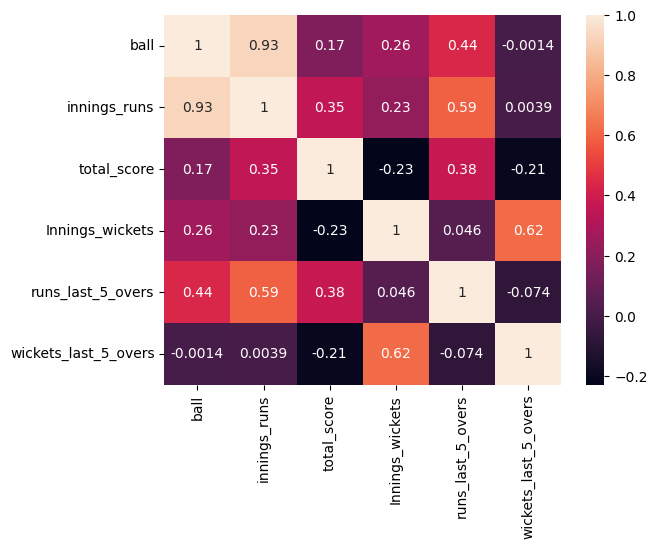

In [ ]:
from seaborn import heatmap
numerical_ipl_df = world_df2.select_dtypes(include=['int64', 'float64', 'int32'])
heatmap(data=numerical_ipl_df.corr(), annot=True)

In [ ]:
#Removing non-consistent teams
const_teams = ['Afghanistan', 'Australia', 'Bangladesh','England', 'India', 'Ireland','New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
               'West Indies', 'Zimbabwe']

print(f'Before Removing Inconsistent Teams : {world_df2.shape}')
world_df2 = world_df2[(world_df2['batting_team'].isin(const_teams)) & (world_df2['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {world_df2.shape}')
print(f"Consistent Teams : \n{world_df2['batting_team'].unique()}")
world_df2.head()

Before Removing Inconsistent Teams : (1265103, 8)
After Removing Irrelevant Columns : (1049505, 8)
Consistent Teams : 
['India' 'Australia' 'England' 'Ireland' 'New Zealand' 'Bangladesh'
 'South Africa' 'Sri Lanka' 'Pakistan' 'Afghanistan' 'West Indies'
 'Zimbabwe']


,ball,batting_team,bowling_team,innings_runs,total_score,Innings_wickets,runs_last_5_overs,wickets_last_5_overs
0,0.1,India,Australia,4,399,0,4.0,0.0
1,0.2,India,Australia,4,399,0,4.0,0.0
2,0.3,India,Australia,8,399,0,8.0,0.0
3,0.4,India,Australia,8,399,0,8.0,0.0
4,0.5,India,Australia,8,399,0,8.0,0.0


In [ ]:
print(f'Before Removing Overs : {world_df2.shape}')
world_df2 = world_df2[world_df2['ball'] >= 5.0]
print(f'After Removing Overs : {world_df2.shape}')
world_df2.head()

Before Removing Overs : (1049505, 8)
After Removing Overs : (927972, 8)


,ball,batting_team,bowling_team,innings_runs,total_score,Innings_wickets,runs_last_5_overs,wickets_last_5_overs
31,5.1,India,Australia,30,399,1,26.0,1.0
32,5.2,India,Australia,30,399,1,22.0,1.0
33,5.3,India,Australia,32,399,1,24.0,1.0
34,5.4,India,Australia,32,399,1,24.0,1.0
35,5.5,India,Australia,36,399,1,23.0,1.0


In [ ]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  world_df2[col] = le.fit_transform(world_df2[col])
world_df2.head()

,ball,batting_team,bowling_team,innings_runs,total_score,Innings_wickets,runs_last_5_overs,wickets_last_5_overs
31,5.1,4,1,30,399,1,26.0,1.0
32,5.2,4,1,30,399,1,22.0,1.0
33,5.3,4,1,32,399,1,24.0,1.0
34,5.4,4,1,32,399,1,24.0,1.0
35,5.5,4,1,36,399,1,23.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ['batting_team', 'bowling_team'])], remainder='passthrough')

ipl_array = columnTransformer.fit_transform(world_df2)

# Convert the sparse matrix to an array
ipl_array = ipl_array.toarray()

print(ipl_array.shape)

# Get the feature names after transformation from the encoder
encoder_feature_names = list(columnTransformer.named_transformers_['encoder'].get_feature_names_out(input_features=['batting_team', 'bowling_team']))

# Combine the encoder feature names with the remaining feature names
feature_names = encoder_feature_names + ['innings_runs', 'Innings_wickets', 'total_score', 'ball', 'runs_last_5_overs', 'wickets_last_5_overs']

print(feature_names)

(927972, 30)
['batting_team_0', 'batting_team_1', 'batting_team_2', 'batting_team_3', 'batting_team_4', 'batting_team_5', 'batting_team_6', 'batting_team_7', 'batting_team_8', 'batting_team_9', 'batting_team_10', 'batting_team_11', 'bowling_team_0', 'bowling_team_1', 'bowling_team_2', 'bowling_team_3', 'bowling_team_4', 'bowling_team_5', 'bowling_team_6', 'bowling_team_7', 'bowling_team_8', 'bowling_team_9', 'bowling_team_10', 'bowling_team_11', 'innings_runs', 'Innings_wickets', 'total_score', 'ball', 'runs_last_5_overs', 'wickets_last_5_overs']


In [ ]:
world_df3 = pd.DataFrame(ipl_array, columns=feature_names)

In [ ]:
world_df3.head()

,batting_team_0,batting_team_1,batting_team_2,batting_team_3,batting_team_4,batting_team_5,batting_team_6,batting_team_7,batting_team_8,batting_team_9,...,bowling_team_8,bowling_team_9,bowling_team_10,bowling_team_11,innings_runs,Innings_wickets,total_score,ball,runs_last_5_overs,wickets_last_5_overs
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.1,30.0,399.0,1.0,26.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.2,30.0,399.0,1.0,22.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.3,32.0,399.0,1.0,24.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.4,32.0,399.0,1.0,24.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.5,36.0,399.0,1.0,23.0,1.0


In [ ]:
features = world_df3.drop(['total_score'], axis=1)
labels = world_df3['total_score']

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (742377, 29)
Testing Set : (185595, 29)


In [ ]:
models = dict()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [ ]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.74%
Test Score : 72.74%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 12.47652415205151
Mean Squared Error (MSE): 1040.1658289704883
Root Mean Squared Error (RMSE): 32.25160195975524


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [ ]:
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 97.91%
Test Score : 86.36%


In [ ]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.260382618033177
Mean Squared Error (MSE): 520.3174322911033
Root Mean Squared Error (RMSE): 22.810467603517104


<BarContainer object of 2 artists>

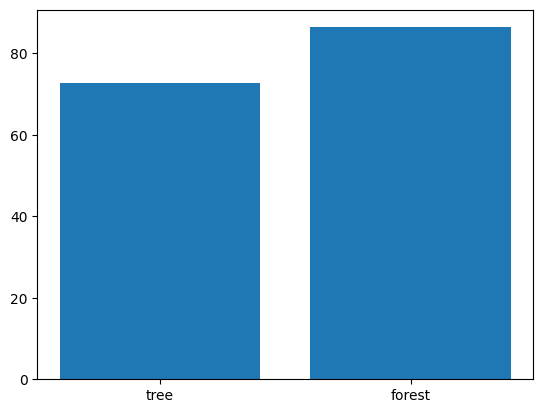

In [ ]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

In [ ]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5_overs, wickets_last_5_overs, model=forest):
    prediction_array = []
  # Batting Team
    if batting_team == 'Afghanistan':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0,0,0]
    elif batting_team == 'Australia':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0,0,0]
    elif batting_team == 'Bangladesh':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0,0,0]
    elif batting_team == 'England':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0,0,0]
    elif batting_team == 'India':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0,0,0]
    elif batting_team == 'Ireland':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0,0,0]
    elif batting_team == 'New Zealand':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0,0,0]
    elif batting_team == 'Pakistan':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0,0,0]
    elif batting_team == 'South Africa':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0,0,0]
    elif batting_team == 'Sri Lanka':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1,0,0]
    elif batting_team == 'West Indies':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,1,0]
    elif batting_team == 'Zimbabwe':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,0,1]
  # Bowling Team
    if bowling_team == 'Afghanistan':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0,0,0]
    elif bowling_team == 'Australia':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0,0,0]
    elif bowling_team == 'Bangladesh':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0,0,0]
    elif bowling_team == 'England':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0,0,0]
    elif bowling_team == 'India':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0,0,0]
    elif bowling_team == 'Ireland':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0,0,0]
    elif bowling_team == 'New Zealand':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0,0,0]
    elif bowling_team == 'Pakistan':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0,0,0]
    elif bowling_team == 'South Africa':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0,0,0]
    elif bowling_team == 'Sri Lanka':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1,0,0]
    elif bowling_team == 'West Indies':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,1,0]
    elif bowling_team == 'Zimbabwe':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,0,1]

    prediction_array = prediction_array + [overs, runs, wickets, runs_last_5_overs, wickets_last_5_overs]
    prediction_array = np.array([prediction_array])
    pred = model.predict(prediction_array)
    return int(round(pred[0]))

In [ ]:
batting_team='Australia'
bowling_team='India'
score = score_predict(batting_team, bowling_team, runs=192, wickets=9, overs=26.3, runs_last_5_overs= 24, wickets_last_5_overs=1)
print(f'Predicted Score : {score} || Actual Score : 217')

Predicted Score : 219 || Actual Score : 217


In [ ]:
batting_team='India'
bowling_team='Australia'
score = score_predict(batting_team, bowling_team, runs=307, wickets=4, overs=36.3, runs_last_5_overs= 24, wickets_last_5_overs=1)
print(f'Predicted Score : {score} || Actual Score : 399')

Predicted Score : 394 || Actual Score : 399
